<a href="https://colab.research.google.com/github/zacknn/MachineLearning/blob/main/models/neural_networks/neural_netwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [4]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data' , train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)


In [5]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 128) #input to hidden
    self.fc2 = nn.Linear(128, 10) #hidden to output
    self.relu = nn.ReLU()
  def forward(self, x):
    x = x.view(-1, 28*28)  # flatten image
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [7]:
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
for epoch in range(5):  # 5 passes through the data
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()   # clear old gradients
        loss.backward()         # backpropagation
        optimizer.step()        # update weights

    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")

Epoch [1/5], Loss: 0.2596
Epoch [2/5], Loss: 0.0812
Epoch [3/5], Loss: 0.0445
Epoch [4/5], Loss: 0.0090
Epoch [5/5], Loss: 0.0216


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 97.43%


Predicted class: 7
Actual label: 7


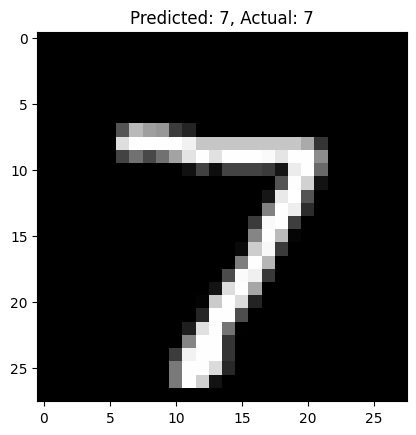

In [11]:
import matplotlib.pyplot as plt

# Get a single image and label from the test set
image, label = test_data[0]

# Add a batch dimension to the image
image = image.unsqueeze(0)

# Make a prediction
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    output = model(image)

# Get the predicted class
_, predicted_class = torch.max(output.data, 1)

print(f"Predicted class: {predicted_class.item()}")
print(f"Actual label: {label}")

# Display the image
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f"Predicted: {predicted_class.item()}, Actual: {label}")
plt.show()